In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sb, numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import os

In [3]:
path='/home/vsvld/Downloads/aoiwa/'
data=[pd.read_csv(path+filename, index_col=None, header=0) for filename in os.listdir(path)]

/home/vsvld/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/vsvld/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [4]:
frame = pd.concat(data, axis=0, ignore_index=True)

In [5]:
df=frame.iloc[list(frame.index)[::2],:]

In [6]:
df.shape

(4836011, 24)

In [7]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-01479400001,2016-11-09,4013,Wal-Mart 0841 / Tipton,1126 Highway 38 North,Tipton,52772,POINT (-91.03069 41.438006),16.0,CEDAR,NaN,NaN,260.0,DIAGEO AMERICAS,558,Crown Royal w/2 Glasses,4,1750,31.99,47.99,8,383.92,14.0,3.70
2,S07429700051,2012-10-19,4083,Fareway Stores #909 / Ankeny,109 SE ORALABOR RD,ANKENY,50021,POINT (-93.59949600000002 41.702811),77.0,Polk,NaN,NaN,461.0,Campari(skyy),3345,Carolan's Irish Cream w/2 Bowls,6,750,7.69,11.54,30,346.20,22.5,5.94
4,S22669900010,2014-12-01,2448,Bottle Boutique,705 E. SECOND,INDIANOLA,50125,POINT (-93.55261600000001 41.358176),91.0,Warren,1701100.0,DECANTERS & SPECIALTY PACKAGES,260.0,Diageo Americas,4109,Captain Morgan Original Spiced 1.75L w/CM Whit...,6,1950,18.00,27.00,6,162.00,11.7,3.09
6,S32864400033,2016-06-15,2285,John's Grocery,401 East Market St,Iowa City,52240,POINT (-91.529854 41.663541),NaN,NaN,1011500.0,STRAIGHT RYE WHISKIES,255.0,Wilson Daniels Ltd.,27102,Templeton Rye,6,750,18.09,27.14,30,814.20,22.5,5.94
8,S30924200038,2016-02-24,3952,Lot-A-Spirits,3780 STATE ST,BETTENDORF,52722,POINT (-90.48065 41.529655),82.0,Scott,1022200.0,NaN,395.0,Proximo,89207,1800 Reposado,6,1000,15.46,23.19,42,973.98,42.0,11.10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4836011 entries, 0 to 9672020
Data columns (total 24 columns):
invoice_and_item_number    object
date                       object
store_number               int64
store_name                 object
address                    object
city                       object
zip_code                   object
store_location             object
county_number              float64
county                     object
category                   float64
category_name              object
vendor_number              float64
vendor_name                object
item_number                object
item_description           object
pack                       int64
bottle_volume_ml           int64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold               int64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtypes: float64(8), int64(4), object(12)
memory usage: 922.4+ MB


In [9]:
for col in df.columns:
    print(f'% of missed data in:{col}-{sum(pd.isnull(df[col]))/len(df[col])*100}')

% of missed data in:invoice_and_item_number-0.0
% of missed data in:date-0.0
% of missed data in:store_number-0.0
% of missed data in:store_name-0.0
% of missed data in:address-0.44933727404672985
% of missed data in:city-0.4493165958472799
% of missed data in:zip_code-0.4496060906395788
% of missed data in:store_location-9.669001993585209
% of missed data in:county_number-0.8818631719406759
% of missed data in:county-0.8818424937412259
% of missed data in:category-0.09301054112573359
% of missed data in:category_name-0.13912292589905192
% of missed data in:vendor_number-2.0678199449918537e-05
% of missed data in:vendor_name-0.0
% of missed data in:item_number-0.0
% of missed data in:item_description-0.0
% of missed data in:pack-0.0
% of missed data in:bottle_volume_ml-0.0
% of missed data in:state_bottle_cost-2.0678199449918537e-05
% of missed data in:state_bottle_retail-2.0678199449918537e-05
% of missed data in:bottles_sold-0.0
% of missed data in:sale_dollars-2.0678199449918537e-05

__9% of data missed in "store_location" and 2% missed in "vendor_number". All other NAs in variables are not statistically significant.__
__Thus it won't impose any restrictions for the EDA implementation__

__We have some useless variables thus i want to drop them. Also I want to make some extra features: margin & revenue_per_liter__

In [11]:
df.drop(columns=(['invoice_and_item_number','pack','volume_sold_gallons']), inplace=True)
df.dropna(inplace=True)

/home/vsvld/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/vsvld/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


__It's better to get from a datetime object different time pats__

In [12]:
df['datetime']=pd.to_datetime(df['date'])
df['weekday']=df.datetime.dt.weekday
df['monthday']=df.datetime.dt.day
df['year']=df.datetime.dt.year
df['month']=df.datetime.dt.month

df['margin']=df.state_bottle_retail-df.state_bottle_cost

/home/vsvld/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/vsvld/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/vsvld/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

__Converting data types of some column into apropriate type__

In [13]:
df = df.astype({
    "county_number": int
    ,"vendor_number": int
    ,"category": int
},inplace=True)

In [14]:
def to_lower(x):
    return x.lower()

df['category_name']=df['category_name'].apply(lambda x:to_lower(x))

__Let's make  fast data analysis__

In [15]:
summary = round(df.describe().T.reset_index(),1)
summary

,index,count,mean,std,min,25%,50%,75%,max
0,store_number,4343190.0,3684.1,996.3,2106.0,2618.0,3778.0,4476.0,9931.0
1,county_number,4343190.0,56.9,27.5,1.0,31.0,61.0,77.0,99.0
2,category,4343190.0,1046356.7,65243.6,1011100.0,1012200.0,1031200.0,1062400.0,1901200.0
3,vendor_number,4343190.0,258.8,139.9,10.0,115.0,260.0,380.0,987.0
4,bottle_volume_ml,4343190.0,919.1,650.6,0.0,750.0,750.0,1000.0,378000.0
5,state_bottle_cost,4343190.0,9.8,10.3,0.0,5.5,8.1,12.0,6468.0
6,state_bottle_retail,4343190.0,14.8,15.5,0.0,8.2,12.3,18.0,9702.0
7,bottles_sold,4343190.0,10.3,27.2,0.0,2.0,6.0,12.0,11952.0
8,sale_dollars,4343190.0,134.1,461.8,0.0,31.0,70.6,138.0,279557.3
9,volume_sold_liters,4343190.0,9.2,33.3,0.0,1.5,5.2,10.5,8964.0


In [16]:
summary.drop(summary.index[[0,1,2,3,10,11,12,13]],inplace=True)
summary.set_index(['index'],inplace=True)
summary

,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,
bottle_volume_ml,4343190.0,919.1,650.6,0.0,750.0,750.0,1000.0,378000.0
state_bottle_cost,4343190.0,9.8,10.3,0.0,5.5,8.1,12.0,6468.0
state_bottle_retail,4343190.0,14.8,15.5,0.0,8.2,12.3,18.0,9702.0
bottles_sold,4343190.0,10.3,27.2,0.0,2.0,6.0,12.0,11952.0
sale_dollars,4343190.0,134.1,461.8,0.0,31.0,70.6,138.0,279557.3
volume_sold_liters,4343190.0,9.2,33.3,0.0,1.5,5.2,10.5,8964.0
margin,4343190.0,4.9,5.2,-3.3,2.8,4.1,6.0,3234.0


#### on the average every deal:
        -costs 134$
    -sells 10 bottles
    -sells 9 liters
    -have 4.9$ margin per bottle
   
#### negative min value of margin shows us the cases when retail price is lower that its net cost

In [17]:
df[df.margin<0]

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,datetime,weekday,monthday,year,month,margin
1964,2019-12-04,5655,One Stop Shop #3 / Algona,220 S Phillips St,Algona,50511,POINT (-94.226877 43.06732),55,KOSSUTH,1701100,temporary & specialty packages,370,PERNOD RICARD USA,647,Kahlua w/Absolut 50ml & Glass,800,10.99,7.85,6,98.94,4.8,2019-12-04,2,4,2019,12,-3.14
2045838,2012-02-28,2573,Hy-Vee Food Store / Muscatine,2400 2ND AVE,MUSCATINE,52761,POINT (-91.035138 41.451349),70,Muscatine,1032080,imported vodka,239,"Russian Standard Vodka, USA",35109,Russian Standard Original Vodka,750,16.33,14.83,2,29.66,1.5,2012-02-28,1,28,2012,2,-1.50
3657470,2012-02-09,2501,Hy-vee #2 / Ames,640 LINCOLNWAY,AMES,50010,POINT (-93.619455 42.022848),85,Story,1032080,imported vodka,239,"Russian Standard Vodka, USA",35109,Russian Standard Original Vodka,750,16.33,14.83,2,29.66,1.5,2012-02-09,3,9,2012,2,-1.50
4838036,2019-12-03,3690,Target Store T-1792 / Waterloo,1501 E San Marnan,Waterloo,50702,POINT (-92.325387 42.464521),7,BLACK HAWK,1701100,temporary & specialty packages,370,PERNOD RICARD USA,647,Kahlua w/Absolut 50ml & Glass,800,10.99,9.00,6,98.94,4.8,2019-12-03,1,3,2019,12,-1.99
5239410,2012-02-09,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,POINT (-93.619787 41.60566),77,Polk,1032080,imported vodka,239,"Russian Standard Vodka, USA",35109,Russian Standard Original Vodka,750,16.33,14.83,24,355.92,18.0,2012-02-09,3,9,2012,2,-1.50
6454924,2019-10-29,5116,New Star Mart / Newton,"702, 1st Ave E",Newton,50702,POINT (-93.04551500000001 41.69943),94,Webster,1701100,temporary & specialty packages,492,WESTERN SPIRITS BEVERAGE,100762,Bird Dog Peach w/2-50mls,850,10.00,7.50,6,90.00,5.1,2019-10-29,1,29,2019,10,-2.50
8065146,2019-10-30,4866,Tobacco Hut #18 / Council Bluffs,429 Veterans Memorial,Council Bluffs,51501,POINT (-95.851844 41.219624),78,POTTAWATTA,1701100,temporary & specialty packages,492,WESTERN SPIRITS BEVERAGE,100762,Bird Dog Peach w/2-50mls,850,10.00,6.71,6,90.00,5.1,2019-10-30,2,30,2019,10,-3.29
8491618,2012-02-27,2285,John's Grocery,401 EAST MARKET ST,IOWA CITY,52240,POINT (-91.529854 41.663541),52,Johnson,1032080,imported vodka,239,"Russian Standard Vodka, USA",35109,Russian Standard Original Vodka,750,16.33,14.83,2,29.66,1.5,2012-02-27,0,27,2012,2,-1.50


In [18]:
df[df.margin==df.margin.max()]

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,datetime,weekday,monthday,year,month,margin
4839222,2016-03-21,2512,Hy-Vee Wine and Spirits / Iowa City,1720 WATERFRONT DR,IOWA CITY,52240,POINT (-91.53046300000001 41.642764),52,Johnson,1011600,corn whiskies,125,"Cedar Ridge Vineyards,LLC",927011,Cedar Ridge Rye Whiskey - Whole Cask Buy,189000,6468.0,9702.0,1,9702.0,189.0,2016-03-21,0,21,2016,3,3234.0


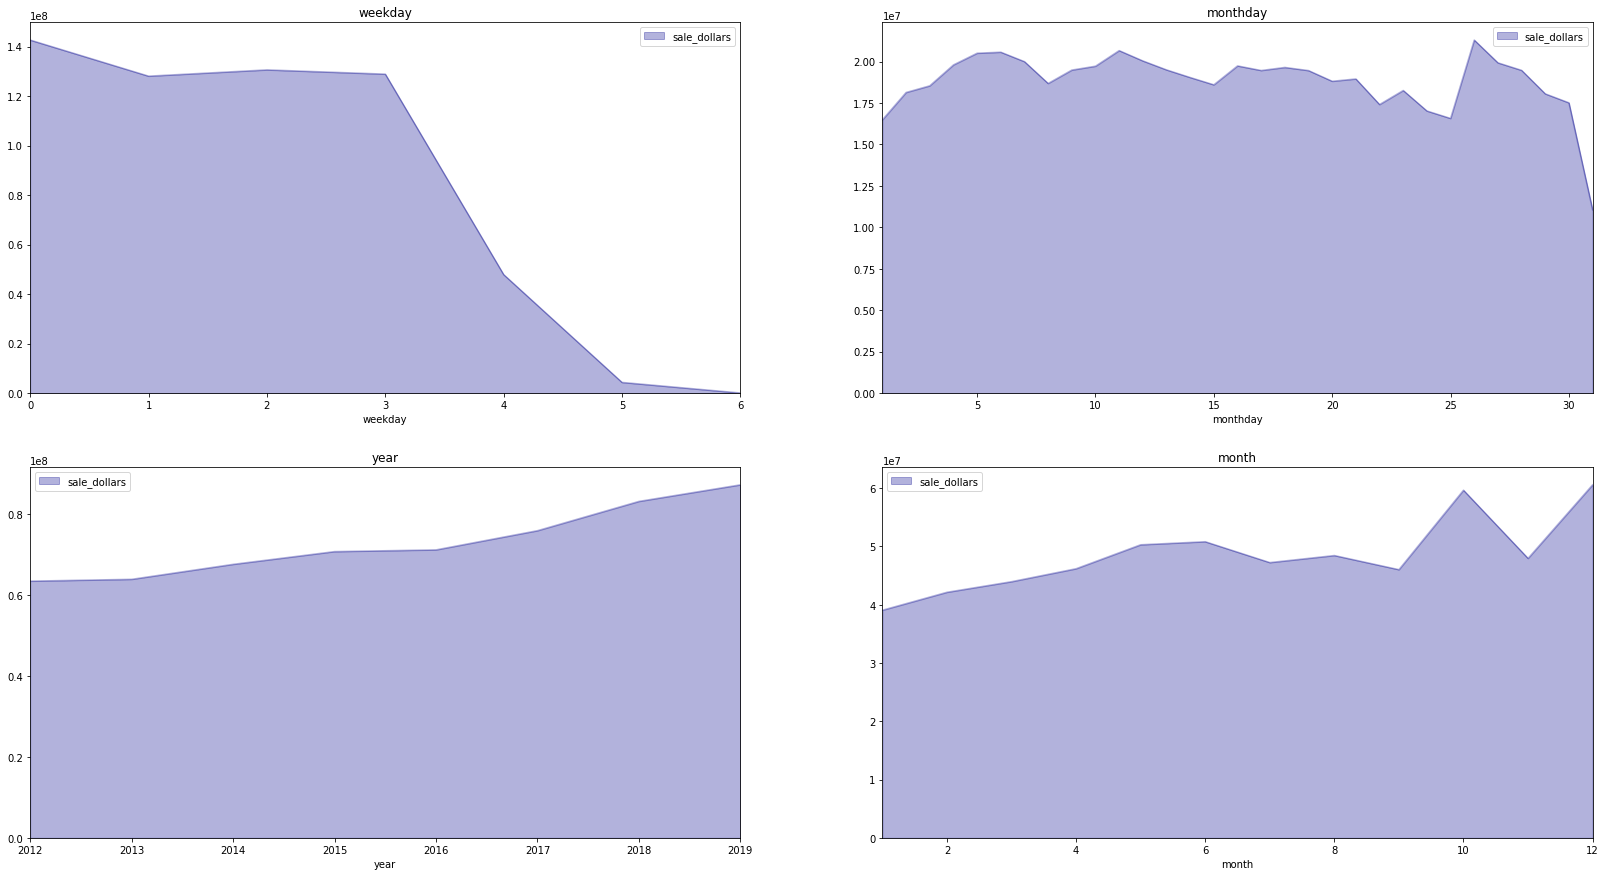

In [19]:
target_column='sale_dollars'
cols = list(df.loc[:,"weekday":"month"].columns)
cols.append(target_column)
df_ = df[cols]

fig = plt.figure(figsize=(28, 15))
cols = 2
rows = 2
for i, column in enumerate(df_.columns):
    if column != target_column:
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        data=df_.groupby(column).sum()[['sale_dollars']]
        data.plot(kind='area',color='darkblue',alpha=0.3,ax=ax)

#### from this line charts we can conclude that:
    - monday(0) is the day with the higest revenue flow. After Thursday(3) the amount of sales declines sharply and nearly stoppes at the end of the week.
    - "year" and "month" charts show permanent increase of sales from year-to-year and from month-to-month respectively. However according to "month" chart, 10th and 12th monthes include the highest sales peaks.

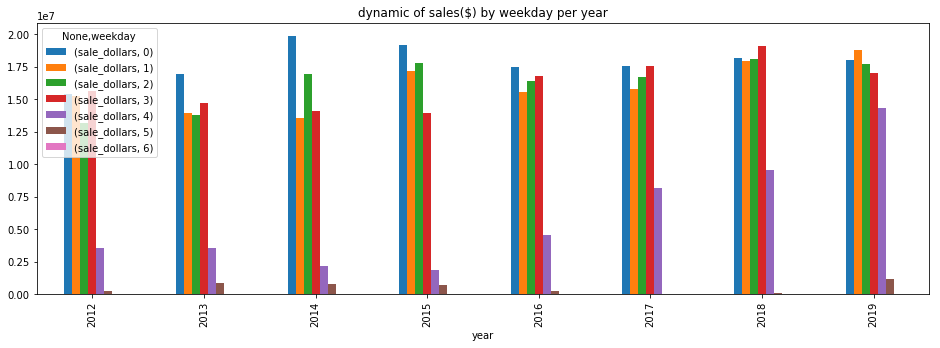

In [139]:
tmp = df[['year','sale_dollars','weekday']].copy()
 
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('dynamic of sales($) by weekday per year')
tmp.groupby(['year','weekday']).sum().unstack().plot(kind='bar',ax=ax)

__At the beginning of the period the highest sales flow was on Monday. But to the end of the period this difference became flatter (from Monday to Thursday). Notice! Any sales during saturday and sunday.__

__Getting deeper let's discover statistic by "bottles_sold" and "sale_dollars" variables grouped by category_name and day of the week__

In [26]:
bottles=pd.pivot_table(df, 
                index = 'category_name'
               ,columns='year'
               ,values='bottles_sold'
               ,aggfunc='count'
               ,fill_value=0
               ,margins=True
              ).sort_values(by='All',ascending=False).drop(index=(['All']))

clr='lightgreen'
bottles.style.format({
                          2012:"{:5,.02f}", 
                          2013:"{:5,.02f}", 
                          2014:"{:5,.02f}",
                          2015:"{:5,.02f}",
                          2016:"{:5,.02f}",
                          2017:"{:5,.02f}",
                          2018:"{:5,.02f}",
                          2019:"{:5,.02f}"                         
                         }).bar(subset=[2012,], color=clr)\
                           .bar(subset=[2013], color=clr)\
                           .bar(subset=[2014], color=clr)\
                           .bar(subset=[2015], color=clr)\
                           .bar(subset=[2016], color=clr)\
                           .bar(subset=[2017], color=clr)\
                           .bar(subset=[2018], color=clr)\
.bar(subset=[2019], color=clr)

year,2012,2013,2014,2015,2016,2017,2018,2019,All
category_name,,,,,,,,,
canadian whiskies,"45,705.00","48,024.00","49,855.00","54,218.00","54,153.00","55,475.00","57,265.00","58,929.00",423624
vodka 80 proof,"63,157.00","62,819.00","65,688.00","70,851.00","49,140.00",0.00,0.00,0.00,311655
american vodkas,0.00,0.00,0.00,0.00,"26,826.00","83,046.00","88,261.00","89,749.00",287882
straight bourbon whiskies,"26,417.00","27,863.00","29,306.00","31,002.00","30,529.00","33,266.00","36,730.00","37,808.00",252921
spiced rum,"27,325.00","27,920.00","28,189.00","29,128.00","29,187.00","29,083.00","29,236.00","28,582.00",228650
blended whiskies,"23,805.00","24,065.00","23,687.00","23,116.00","22,713.00","23,183.00","23,581.00","24,655.00",188805
whiskey liqueur,"11,875.00","15,199.00","19,077.00","21,795.00","23,520.00","24,452.00","26,749.00","30,178.00",172845
vodka flavored,"25,128.00","25,072.00","25,733.00","28,147.00","18,513.00",0.00,0.00,0.00,122593
flavored rum,"15,680.00","14,201.00","13,940.00","14,493.00","14,226.00","14,190.00","14,966.00","14,769.00",116465


__"Canadian whiskies" category is the most popular. Something had happened between 2015-2016 yrs and category structure changed. For instance "VODKA 80 PROOF" was replaced by the "American Vodkas".__

Categories had dissapeared since 2016:
    - "vodka 80 proof"
    - "vodka flavored"
    - "tequila"
    - "imported vodka"
    - "puerto rico & virgin islands rum"
    - "american cocktails"
    - "imported vodka - misc"
    - "misc. imported cordials & liqueurs"
    - "american grape brandies"
    
Categories had broken into the market:
    - "american flavored vodka"
    - "flavored rum"
    - "tennessee whiskies"
    - "american dry gins"
    - "american flavored vodka"

In [27]:
sales=pd.pivot_table(df, 
                index = 'category_name'
               ,columns='year'
               ,values='sale_dollars'
               ,aggfunc='sum'
               ,fill_value=0
               ,margins=True
              ).sort_values(by='All',ascending=False).drop(index=(['All']))

clr='#FFA07A'
sales.style.format({
                          2012:"${:5,.02f}", 
                          2013:"${:5,.02f}", 
                          2014:"${:5,.02f}",
                          2015:"${:5,.02f}",
                          2016:"${:5,.02f}",
                          2017:"${:5,.02f}",
                          2018:"${:5,.02f}",
                          2019:"${:5,.02f}"                         
                         }).bar(subset=[2012,], color=clr)\
                           .bar(subset=[2013], color=clr)\
                           .bar(subset=[2014], color=clr)\
                           .bar(subset=[2015], color=clr)\
                           .bar(subset=[2016], color=clr)\
                           .bar(subset=[2017], color=clr)\
                           .bar(subset=[2018], color=clr)\
.bar(subset=[2019], color=clr)

year,2012,2013,2014,2015,2016,2017,2018,2019,All
category_name,,,,,,,,,
canadian whiskies,"$7,189,934.98","$7,806,943.18","$8,201,009.11","$8,682,753.04","$8,902,359.08","$9,625,120.33","$10,499,441.06","$10,516,369.00",7.14239e+07
spiced rum,"$5,028,117.06","$5,215,057.94","$5,485,723.30","$5,453,930.25","$5,425,442.61","$5,418,947.21","$5,511,510.74","$5,338,163.66",4.28769e+07
american vodkas,$ 0.00,$ 0.00,$ 0.00,$ 0.00,"$3,390,901.12","$10,864,179.18","$12,084,903.75","$12,818,151.01",3.91581e+07
vodka 80 proof,"$6,675,444.45","$6,964,900.12","$7,792,817.03","$8,414,453.16","$5,945,984.09",$ 0.00,$ 0.00,$ 0.00,3.57936e+07
straight bourbon whiskies,"$2,879,360.39","$3,205,315.63","$3,640,746.59","$4,050,862.30","$4,134,615.78","$4,505,901.44","$5,250,835.01","$5,978,728.54",3.36464e+07
whiskey liqueur,"$1,664,967.31","$2,287,776.52","$3,358,442.72","$3,590,379.10","$3,733,559.76","$3,750,500.02","$4,172,246.91","$4,796,693.53",2.73546e+07
tennessee whiskies,"$2,710,146.23","$2,881,214.82","$3,062,711.47","$3,408,537.53","$3,324,918.83","$3,342,388.67","$3,549,760.89","$3,768,968.28",2.60486e+07
imported vodka,"$3,924,686.01","$3,926,603.37","$3,934,289.82","$4,517,605.97","$2,747,576.01","$94,026.14","$6,673.68","$106,472.16",1.92579e+07
tequila,"$3,541,774.85","$3,285,809.29","$3,647,805.96","$4,024,453.50","$2,709,129.43",$ 0.00,$ 0.00,$ 0.00,1.7209e+07


    - "canadian whiskies"
    - "spiced rum"
    - "american vodkas"
    - "vodka 80 proof"
    - "straight bourbon whiskies"
    - "whiskey liqueur"
    - "tennessee whiskies"
    - "imported vodka"
__These are the market drivers that generate the biggest part of sales revenue__

__Unfourtanetly dataset doesn't include separate information about brand names and types of drink. Some of this information is inside the text string variable "item_description"__

In [28]:
for elem in list(df['item_description'].unique()):
    print(elem.split(' '),elem)

['Captain', 'Morgan', 'Original', 'Spiced', '1.75L', 'w/CM', 'White', '200ml', 'Tray', 'Pack'] Captain Morgan Original Spiced 1.75L w/CM White 200ml Tray Pack
['Tanqueray', 'Gin'] Tanqueray Gin
['Paramount', 'Gold', 'Rum'] Paramount Gold Rum
['Christian', 'Bros', 'Brandy'] Christian Bros Brandy
['Paramount', 'Sloe', 'Gin'] Paramount Sloe Gin
['Dekuyper', 'Grape', 'Pucker'] Dekuyper Grape Pucker
['Jameson', 'w/2-50mls'] Jameson w/2-50mls
['Kahlua', 'Coffee', 'Mini'] Kahlua Coffee Mini
['Tortilla', 'Gold', 'DSS'] Tortilla Gold DSS
['Smirnoff', 'Red,', 'White', '&', 'Berry', 'Mini'] Smirnoff Red, White & Berry Mini
['Templeton', 'Rye'] Templeton Rye
['Kahlua', 'Coffee', 'Liqueur'] Kahlua Coffee Liqueur
['Paramount', 'Triple', 'Sec'] Paramount Triple Sec
["Member's", 'Mark', 'Spiced', 'Rum'] Member's Mark Spiced Rum
['Canadian', 'Club', 'Apple', 'Mini'] Canadian Club Apple Mini
['Big', 'Peach', 'Liqueur'] Big Peach Liqueur
['Balvenie', '12yr', 'Doublewood', 'Single', 'Malt', 'Scotch'] Balv

['Stirrings', 'Ginger', 'Liqueur'] Stirrings Ginger Liqueur
['Kauai', 'Dark', 'Hawaiian', 'Rum'] Kauai Dark Hawaiian Rum
['1921', 'Tequila', 'Blanco'] 1921 Tequila Blanco
['Roger', 'Clynes', 'Mexican', 'Moonshine', 'Silver', 'Tequila'] Roger Clynes Mexican Moonshine Silver Tequila
['Blue', 'Ox', '151'] Blue Ox 151
['Burnetts', 'Vanilla'] Burnetts Vanilla
['Caol', 'Ila', '12YR'] Caol Ila 12YR
["Jacquin's", 'Blackberry', 'Brandy'] Jacquin's Blackberry Brandy
['Aalborg', 'Taffel', 'Aquavit'] Aalborg Taffel Aquavit
['HA', 'Ardbeg', 'Drum'] HA Ardbeg Drum
['Smirnoff', 'Vodka', 'Traveller'] Smirnoff Vodka Traveller
['Skyy', 'Vodka'] Skyy Vodka
['Five', "O'clock", 'PET', 'Vodka'] Five O'clock PET Vodka
['Iowa', 'Legendary', 'Rye', 'Aged', 'DISCO'] Iowa Legendary Rye Aged DISCO
['Avion', 'Extra', 'Anejo', 'w/Waterford', 'Glasses'] Avion Extra Anejo w/Waterford Glasses
['Deep', 'Eddy', 'Peach'] Deep Eddy Peach
['Belvedere', 'Vodka'] Belvedere Vodka
['Dekuyper', 'Signature', 'Creme', 'De', 'Bana

['Dr.', 'Apple', 'Whiskey', 'Mini'] Dr. Apple Whiskey Mini
['Dr.', 'Honey', 'Whiskey', 'Mini'] Dr. Honey Whiskey Mini
['Southern', 'Comfort', 'Cherry', 'DISCO'] Southern Comfort Cherry DISCO
['Dr.', 'Peach', 'Whiskey', 'Mini'] Dr. Peach Whiskey Mini
['Hopper', '&', 'Woods', 'Rock', 'and', 'Rye'] Hopper & Woods Rock and Rye
['Stone', 'Fence', 'Apple', 'Cider', 'Whiskey'] Stone Fence Apple Cider Whiskey
['Farmer', 'Brown', 'Whiskey'] Farmer Brown Whiskey
['Kessler', 'Blend', 'Whiskey'] Kessler Blend Whiskey
['Five', 'Star'] Five Star
['Seagrams', '7', 'Crown', 'Bl', 'Whiskey'] Seagrams 7 Crown Bl Whiskey
["Beam's", '8', 'Star', 'Bl', 'Whiskey'] Beam's 8 Star Bl Whiskey
['Seagrams', 'Seven', 'Crown', 'Dark', 'Honey'] Seagrams Seven Crown Dark Honey
['Hawkeye', 'Blend', 'Whiskey'] Hawkeye Blend Whiskey
['Iowish', 'Whiskey'] Iowish Whiskey
["Fleischmann's", 'Preferred', 'Bl', 'Whiskey'] Fleischmann's Preferred Bl Whiskey
['Tin', 'Cup', 'Whiskey', 'HA'] Tin Cup Whiskey HA
['Mccormick', 'Blen

['Bleu', 'Original'] Bleu Original
['Kinky', 'Blue', 'Liqueur'] Kinky Blue Liqueur
['Travis', "Hasse's", 'Apple', 'Pie'] Travis Hasse's Apple Pie
['Kinky', 'Naughty', '&', 'Nice', 'Red', 'Liqueur'] Kinky Naughty & Nice Red Liqueur
['Pear', 'Necessity', 'Liqueur'] Pear Necessity Liqueur
['Travis', "Hasse's", 'Cow', 'Pie'] Travis Hasse's Cow Pie
['Metcalfes', 'Vermont', 'Maple', 'Cream'] Metcalfes Vermont Maple Cream
['Letherbee', 'Fernet'] Letherbee Fernet
['Lemon', 'Ginger', '5', 'Infused', 'Vodka'] Lemon Ginger 5 Infused Vodka
['Paramount', 'Creme', 'de', 'Menthe', 'Green'] Paramount Creme de Menthe Green
['Kinky', 'Green'] Kinky Green
['Arrow', 'Creme', 'de', 'Menthe', 'White'] Arrow Creme de Menthe White
['Paramount', 'Creme', 'de', 'Cacao', 'Dark'] Paramount Creme de Cacao Dark
['Blue', 'Chair', 'Bay', 'Key', 'Lime', 'Rum', 'Cream'] Blue Chair Bay Key Lime Rum Cream
['Kinky', 'Ruby'] Kinky Ruby
['Juggs', 'Cherry', "Cha-Cha's"] Juggs Cherry Cha-Cha's
['99', 'Peaches', 'Mini'] 99 Pea

['Alize', 'Red'] Alize Red
['Chinaco', 'Reposado', 'Tequila'] Chinaco Reposado Tequila
['Black', 'Maple', 'Hill', 'Oregon', 'Straight', 'Rye'] Black Maple Hill Oregon Straight Rye
['Glen', 'Scotia', '15', 'Year', 'Old'] Glen Scotia 15 Year Old
['Sierra', 'Norte', 'White', 'Corn', 'Whiskey'] Sierra Norte White Corn Whiskey
['Himbrimi', 'Icelandic', 'Old', 'Tom', 'Gin'] Himbrimi Icelandic Old Tom Gin
['Blumers', 'Absinthe'] Blumers Absinthe
['Cruzan', 'Guava'] Cruzan Guava
['Kurayoshi', '8YR', 'Single', 'Malt', 'Whisky'] Kurayoshi 8YR Single Malt Whisky
['Kaiyo', 'The', 'Single', '7YR'] Kaiyo The Single 7YR
['Kah', 'Tequila', 'Reposado', 'Mini'] Kah Tequila Reposado Mini
['Chamucos', 'Tequila'] Chamucos Tequila
['Espolon', 'Tequila', 'Reposado'] Espolon Tequila Reposado
['Tattersall', 'Distilling', 'Blackstrap', 'Rum'] Tattersall Distilling Blackstrap Rum
['Crusoe', 'Spiced', 'Rum'] Crusoe Spiced Rum
['Sugarlands', 'Mark', '&', 'Diggers', 'Hazelnut', 'Rum'] Sugarlands Mark & Diggers Haze

__In most cases brand name is at the 0th element of the string. But, it's not a rule__

In [81]:
dd={}
for elem in list(df['item_description']):
    try:
        
        if len(elem)>1:
            brand = elem.split(' ')[0]
        else:
            brand=elem        
        
        if brand not in dd:
            dd[brand]=1
        else:
            dd[brand]+=1
    except:
        pass
    
brand_cnt=pd.DataFrame(sorted(dd.items(), key=lambda x:x[1],reverse=True)).rename(columns=(
{
    0:"brand",
    1:"count"
}))
brand_cnt['share']=brand_cnt['count']/brand_cnt['count'].sum()*100

brand_cnt

,brand,count,share
0,Black,174229,4.011545
1,Paramount,166461,3.832690
2,Captain,160691,3.699838
3,Smirnoff,144798,3.333909
4,Hawkeye,136211,3.136197
5,Five,135144,3.111630
6,Crown,126486,2.912283
7,Bacardi,117394,2.702944
8,Seagrams,116979,2.693389
9,Jose,112802,2.597215


__Quite rude manner but in this way we can make a fast brand exploration and to get the frequency of brand appearance__ 

In [33]:
# Procedure for extraction of a brand name

def drink_type(text):
    type_=""
    if 'vodka' in text.lower():
        type_='vodka'
    elif 'rum' in text.lower():
        type_='rum'
    elif 'whiskey' in text.lower():
        type_='whiskey'
    elif 'tequila' in text.lower():
        type_='tequila'
    elif 'gin' in text.lower():
        type_='gin'
    elif 'brandy' in text.lower():
        type_='brandy'
    elif 'liqueur' in text.lower():
        type_='liqueur'
    elif 'bourbon' in text.lower():
        type_='bourbon'
    elif 'margarita' in text.lower():
        type_='margarita'
    else:
        type_='other'
    return type_

In [ ]:
df['type_']=df.item_description.apply(lambda x:drink_type(x))

In [98]:
tmp=round(df[['type_','year','sale_dollars']].groupby(['year','type_']).sum().unstack(),2)

sale_dollars                                                                                                             
type_      bourbon      brandy         gin     liqueur  margarita        other         rum     tequila        vodka     whiskey
year                                                                                                                           
2012     691435.40   939990.53  3065983.05  3508503.71  895782.86  26105619.09  9049136.87  3070647.20  13668238.96  2370254.04
2013     773574.91  1000699.71  3101925.07  2736228.48  694127.48  27921366.55  8354760.08  2763260.34  13417274.09  3050806.54
2014     897202.94  1064178.78  3205183.35  2539301.68  604276.81  30401302.82  7990373.13  2982552.46  13876849.95  3950649.05
2015    1011934.56  1047990.57  3280512.06  2429985.08  629866.04  32336541.07  7863519.00  3170697.91  14836189.47  4049793.20
2016    1077557.96   993657.61  2971650.01  2260547.16  720924.44  33570363.57  7655629.42  3155122.71  14585318.56  4091014.21
2017    1255416.03  1039183.71  3138655.33  2284118.88  848996.41  37468046.09  7615112.10  3309197.72  14573421.69  4287361.19
2018    1479699.05  1045997.28  3209093.57  2158712.40  871968.54  43484803.75  7816568.46  3219705.50  15300886.95  4460726.19
2019    1530266.85   908299.59  4240131.17  1609973.40  953730.80  53081470.84  6129309.63  1320321.16  12821293.65  4542419.80

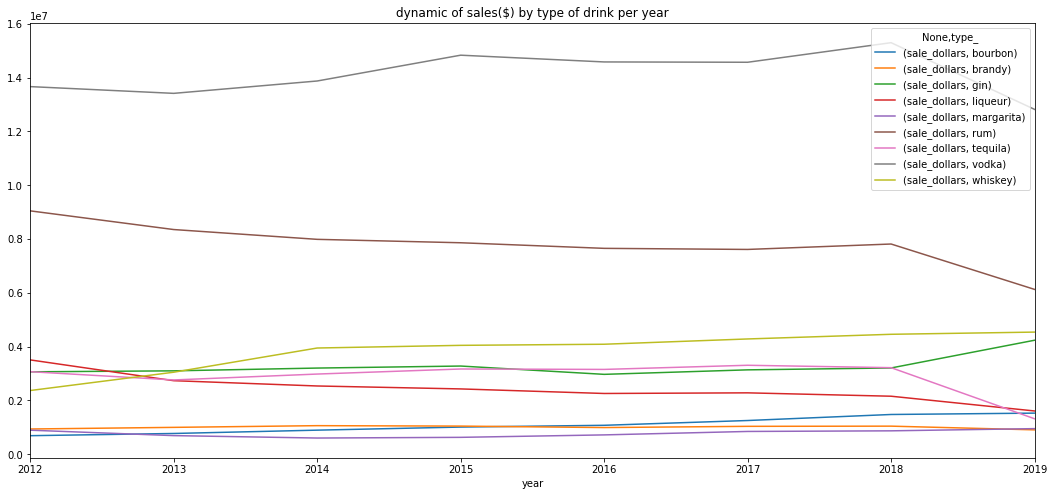

In [101]:
tmp=round(df[df.type_!='other'][['type_','year','sale_dollars']].groupby(['year','type_']).sum().unstack(),2)
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('dynamic of sales($) by type of drink per year')
tmp.plot(kind='line',ax=ax)

__without "other" group left just 9 types:__
    - bourbone,gin, whiskey becomes more popular YTY
    - vodka,brandy,liqueur,margarita,tequila looses their popularity
    
__IT IS IMPORTANT! there is a big group "other" that is highly possible includes also mentioned above types of drink BUT! When we were parsing the "item_description" variable it didn't contain direct words like "vodka","gin" and so on.__

In [44]:
# Procedure for extraction of a brand name
def brand(x):
    try:
        if len(x)>1:
            return(x.split(' ')[0])
        else:
            return x
    except:        
        pass

In [45]:
df['brand']=df.item_description.apply(lambda x:brand(x))

In [ ]:
#Most expensive brands

In [141]:
tmp=round(df[['brand','sale_dollars','year']]\
          .groupby(['brand']).sum(),2).sort_values(by='sale_dollars',ascending=False)

In [186]:
brands_sales = list(tmp.reset_index()['brand'].head(9))

In [187]:
brandSales=df[df.brand.isin(brands_sales)].loc[:,"bottle_volume_ml":"brand"]

### Brand sales per Year

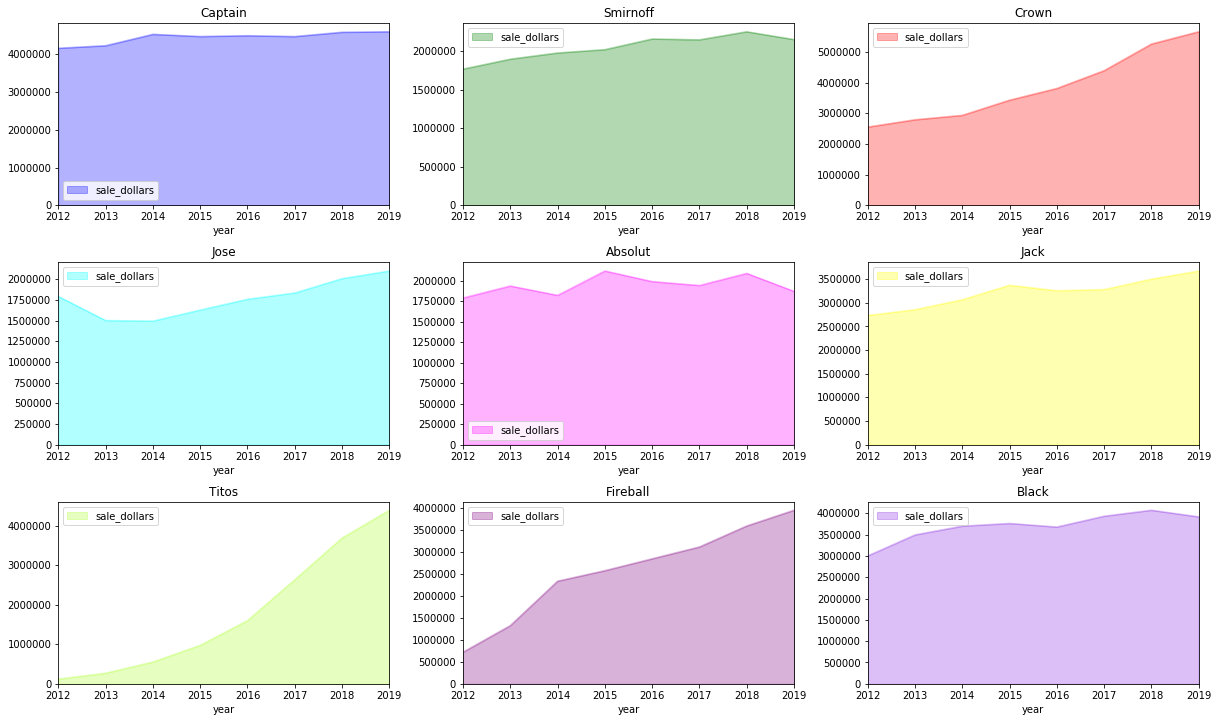

In [214]:
brands = list(brandSales.brand.unique())
brandSales[['year','sale_dollars','brand']]
colors = ['blue','green','red','cyan','magenta','yellow','greenyellow','purple','blueviolet']
fig = plt.figure(figsize=(17, 13))
cols = 3
rows = 4
for i, column in enumerate(brands):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    brandSales[brandSales.brand==column].groupby(['year'])\
    .sum()[['sale_dollars']].plot(kind='area',alpha=0.3,color=colors[i],ax=ax)
plt.tight_layout(1)

### Brand sales by month

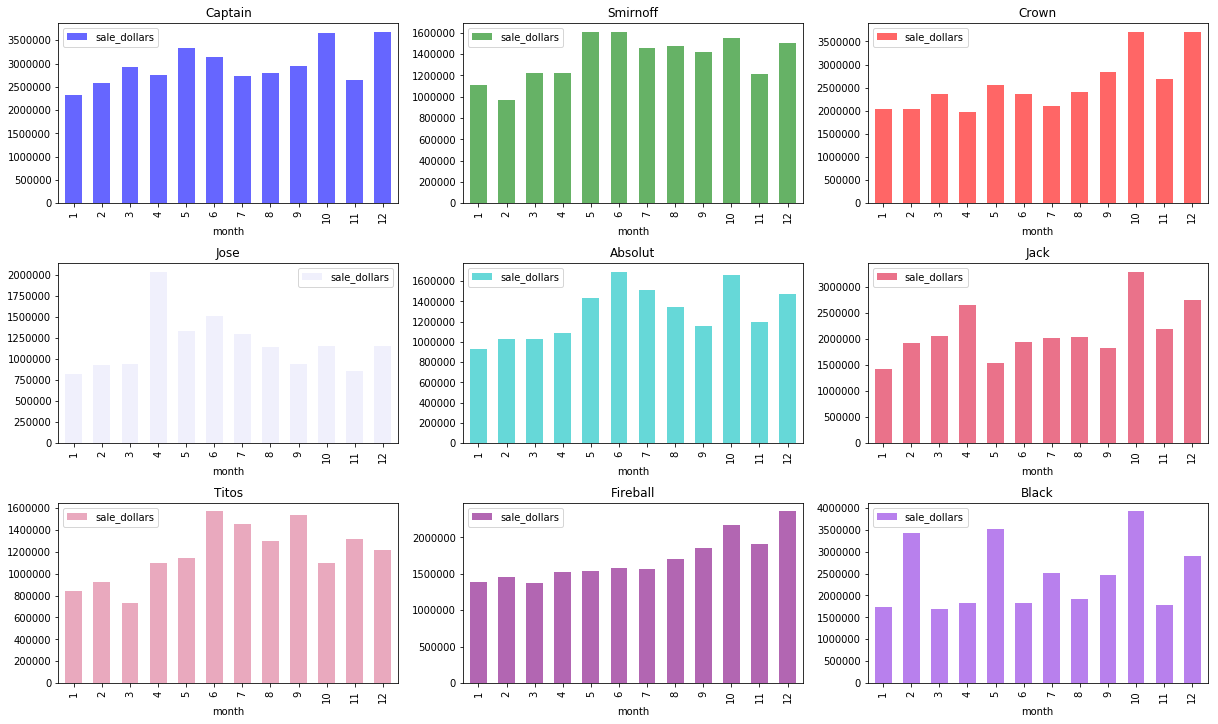

In [217]:
brands = list(brandSales.brand.unique())
brandSales[['month','sale_dollars','brand']]
colors = ['blue','green','red','lavender','c','crimson','palevioletred','purple','blueviolet']
fig = plt.figure(figsize=(17, 13))
cols = 3
rows = 4
for i, column in enumerate(brands):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    brandSales[brandSales.brand==column].groupby(['month'])\
    .sum()[['sale_dollars']].plot(kind='bar',alpha=0.6,width=0.6,color=colors[i],ax=ax)
plt.tight_layout(1)

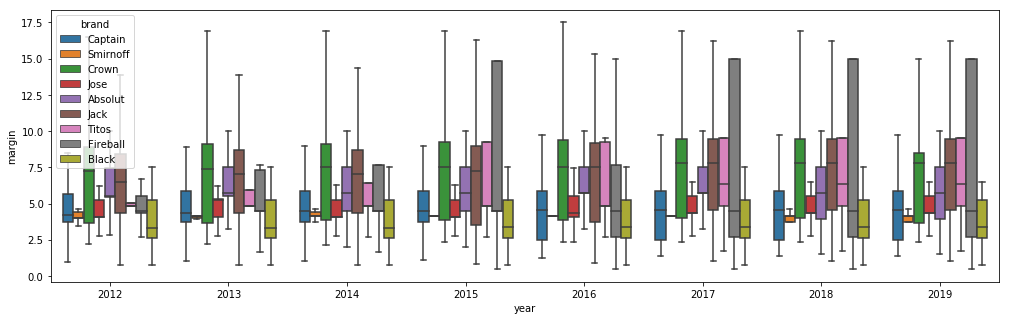

In [205]:
fig = plt.figure(figsize=(17, 5))
ax=fig.add_subplot(1,1,1)
sb.boxplot(x='year',y='margin', hue='brand',data=brandSales, showfliers=False,ax=ax)